# MSikos Task 1.7: Creating Network Visualizations

Link to Github Repository: https://github.com/MSikos/20th-Century

## 1. Install libraries and load data file

In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [13]:
# set path for data files
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialiaztion Course\Achievement 1\Repositories\20th-Century'

In [14]:
# Import relationship data
relationship_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', "20thCentury_relationship.csv"), index_col = 0)

In [15]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,26
2,Austria,Germany,16
3,Austria,Hungary,6
4,Bulgaria,Hungary,6
...,...,...,...
74,Australia,Vietnam,3
75,Cuba,United States,2
76,Canada,Japan,6
77,Canada,Lithuania,1


## 2. Create a visualization using Networkx

In [16]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

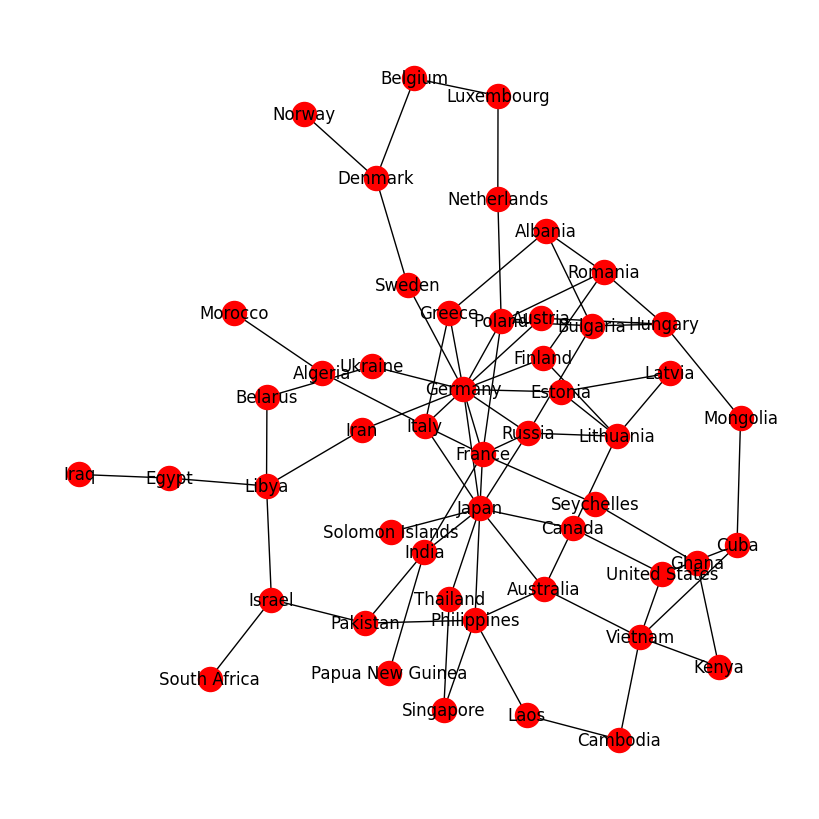

In [17]:
h = plt.figure(figsize = (8,8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [18]:
visual_path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Specialiaztion Course\Achievement 1\Repositories\20th-Century\04 Visualizations'
plt.savefig("networkx_plt_countries2.png")

<Figure size 640x480 with 0 Axes>

## 3. Create a visualization using Pyvis

In [19]:
# Define net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

countries.html


## 4. Community detection using the Leiden algorithm

In [20]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [21]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [22]:
new_com = coms.to_node_community_map()
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Austria': [0],
             'Hungary': [0],
             'Bulgaria': [0],
             'Italy': [0],
             'Poland': [0],
             'Finland': [0],
             'Greece': [0],
             'Albania': [0],
             'Romania': [0],
             'Ukraine': [1],
             'Belarus': [1],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Iran': [1],
             'Papua New Guinea': [1],
             'Laos': [2],
             'Cambodia': [2],
             'Vietnam': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Seychelles': [2],
             'Mongolia': [2],
             'Cuba': [2],
             'United States': [2],
             'Japan': [3],
             'Thailand': [3],

In [23]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k,v in new_com.items()}
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Austria': 0,
 'Hungary': 0,
 'Bulgaria': 0,
 'Italy': 0,
 'Poland': 0,
 'Finland': 0,
 'Greece': 0,
 'Albania': 0,
 'Romania': 0,
 'Ukraine': 1,
 'Belarus': 1,
 'Libya': 1,
 'Egypt': 1,
 'Iraq': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Iran': 1,
 'Papua New Guinea': 1,
 'Laos': 2,
 'Cambodia': 2,
 'Vietnam': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Seychelles': 2,
 'Mongolia': 2,
 'Cuba': 2,
 'United States': 2,
 'Japan': 3,
 'Thailand': 3,
 'Singapore': 3,
 'Philippines': 3,
 'Australia': 3,
 'Solomon Islands': 3,
 'Canada': 3,
 'Netherlands': 4,
 'Luxembourg': 4,
 'Belgium': 4,
 'Denmark': 4,
 'Norway': 4,
 'Sweden': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5,
 'Algeria': 6,
 'Morocco': 6}

In [24]:
# Rerun network graph with the communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


<b>Impressions: The Leiden algorithm confirmed our initial thoughts about the relationships between the countries. Germany had the most number of mentions in our web scrape which makes sense since Germany was instrumental in many events that shaped the 20th century such as both of the World Wars, the country was split in two by the Berlin Wall after World War 2, and was later reunified in 1990. Most of the countries that are closely associated with Germany are in Europe or played roles in the World Wars. I am surprised that the United States does not have more associations then what is displayed, since the U.S did play a large role towards the end of World War 2 with the war in the Pacific, the development of the atomic bombs that were dropped on Hiroshima and Nagasaki, and the landing at Normanday and joining forces with the Allied Powers leading to the repelling of the German forces out of France and back into Germany. The U.S also had conflicts in Vietman and Korea which would have led me to believe there would be a more nodes attached to it.






## 5. Calculating and Visualizing the degree, closeness, and betweenness centrality measures

### Calculate the degree centrality

In [25]:
# Calculate Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.14285714285714285,
 'Russia': 0.1020408163265306,
 'Germany': 0.24489795918367346,
 'Austria': 0.04081632653061224,
 'Hungary': 0.08163265306122448,
 'Bulgaria': 0.08163265306122448,
 'Ukraine': 0.04081632653061224,
 'Italy': 0.1020408163265306,
 'Poland': 0.1020408163265306,
 'Estonia': 0.061224489795918366,
 'Latvia': 0.04081632653061224,
 'Lithuania': 0.1020408163265306,
 'Finland': 0.061224489795918366,
 'Netherlands': 0.04081632653061224,
 'Luxembourg': 0.04081632653061224,
 'Belgium': 0.04081632653061224,
 'Denmark': 0.061224489795918366,
 'Norway': 0.02040816326530612,
 'Sweden': 0.04081632653061224,
 'Greece': 0.061224489795918366,
 'Albania': 0.061224489795918366,
 'Belarus': 0.04081632653061224,
 'Libya': 0.08163265306122448,
 'Egypt': 0.04081632653061224,
 'Iraq': 0.02040816326530612,
 'Japan': 0.2040816326530612,
 'Algeria': 0.04081632653061224,
 'Morocco': 0.02040816326530612,
 'Thailand': 0.04081632653061224,
 'Singapore': 0.04081632653061224,
 'Philippines':

In [26]:
# Create a dataframe containing the calculated degree centrality
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [27]:
# Sort the dataframe by descending values
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

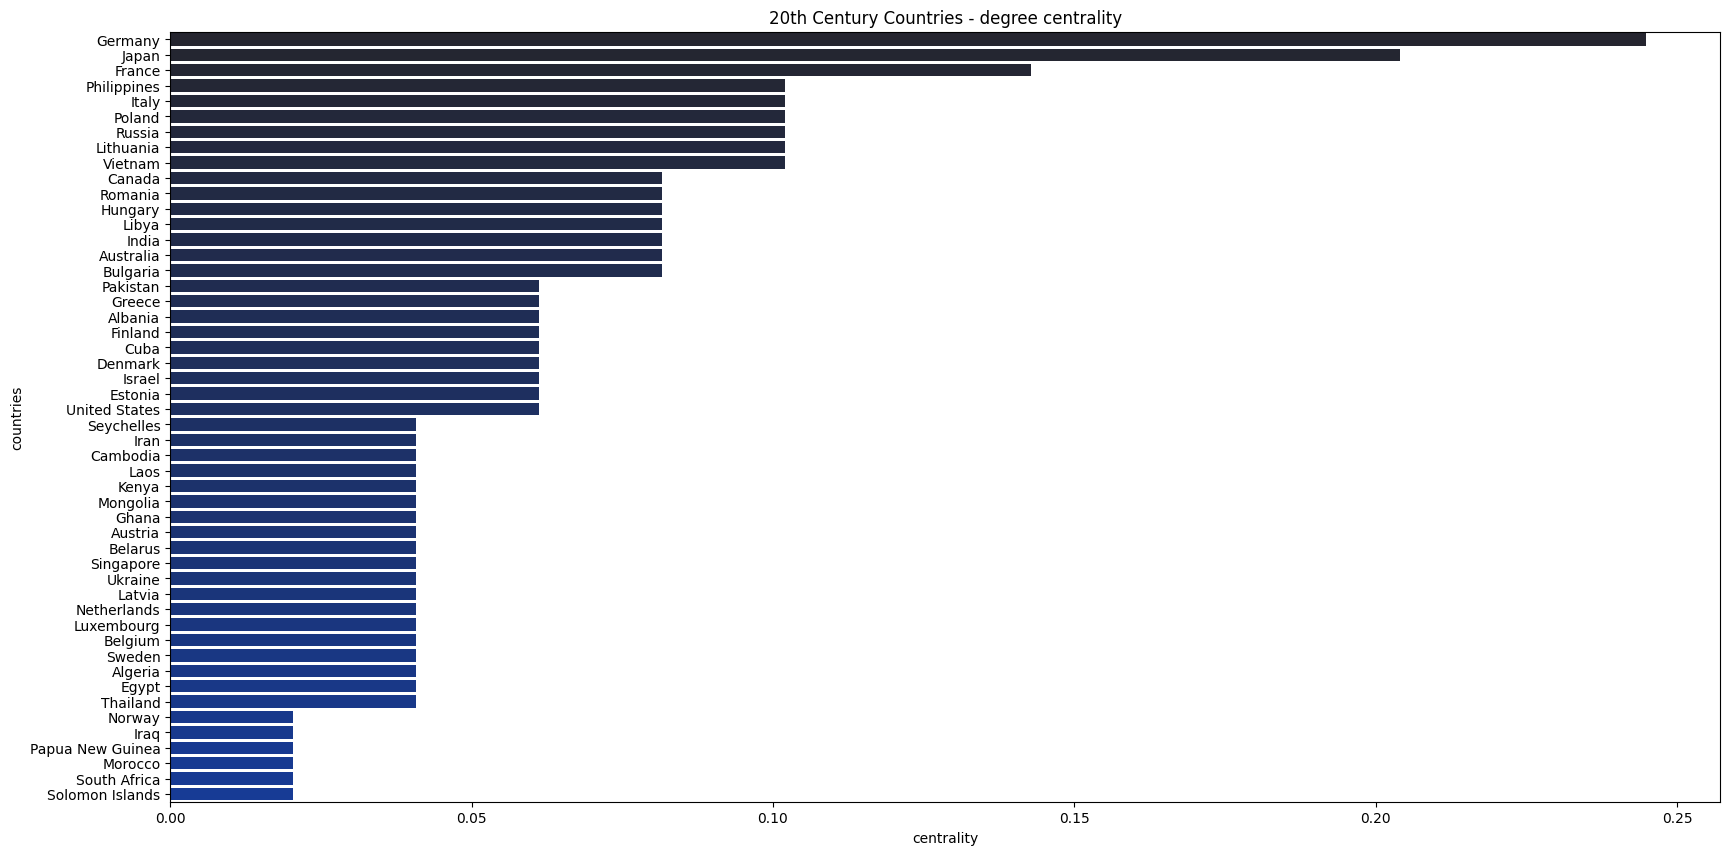

In [28]:
# Plot the degree centrality
plt.figure(figsize = (20, 10))
with sns.dark_palette("xkcd:blue", 80):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Countries - degree centrality")

<b> Impressions: The degree centrality graph further reinforces the observations obtained from the Leiden algorithm plot. Germany has the most connections, followed by Japan and France. One surpirise was that the Philipines is in the fourth group alongside other European countries that participated in the World Wars and that Canada had more associations than the United States. 

# Calculate the closeness centrality

In [29]:
# Calculate the closeness centrality and create a dataframe using the result
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [30]:
# Sort the dataframe descending by calculated centrality values
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

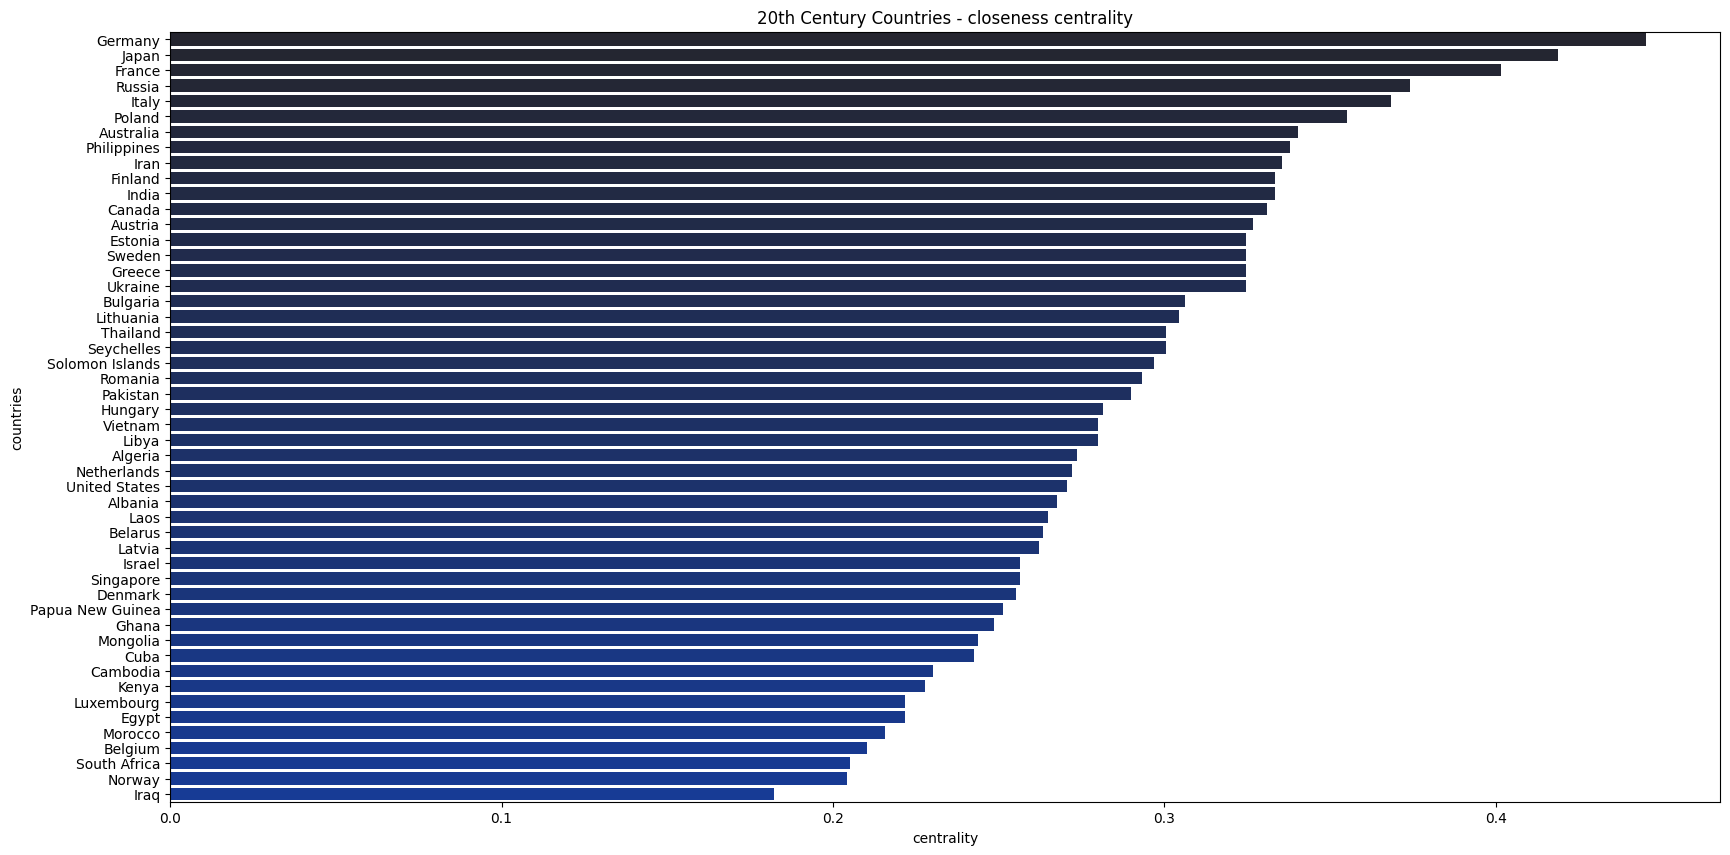

In [31]:
# Graph the dataframe
plt.figure(figsize = (20, 10))
with sns.dark_palette("xkcd:blue", 80):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Countries - closeness centrality")

<b> Impressions: The closeness centrality plot looks as I would expect it to, after reviewing the degree centrality and Leiden algorithm plots. The countries most involved in world Wars 1 and 2 are the top countries with the shortest distance to other countries. I am surprised that Australia and the Philipines are so high up on the list while the U.S is in the bottom half of the countries.

### Calculate the betweenness centrality

In [32]:
# Calculate the betweenness centrality and create a dataframe using the values
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [33]:
# Sort the dataframe by descemdomg values
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

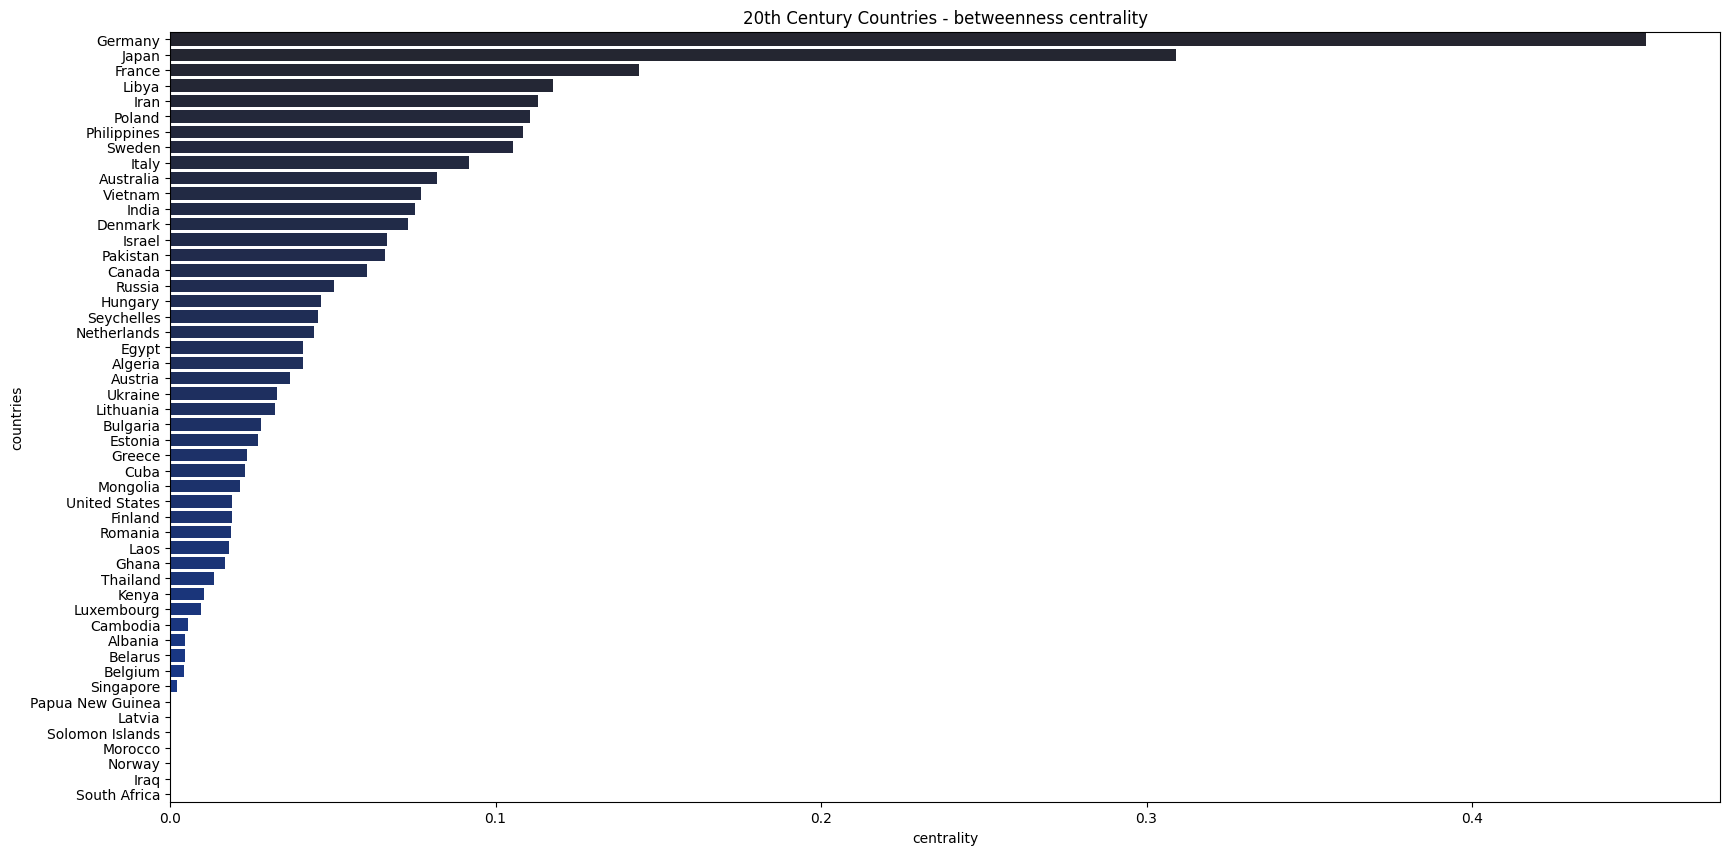

In [34]:
# Create a graph of the betweenness centrality
plt.figure(figsize = (20, 10))
with sns.dark_palette("xkcd:blue", 80):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Countries - betweenness centrality")

<b> Impressions: The betweenness centrality plot appears as I would expect after reviewing all of the other plots to this point. Germany serves as the bridge between many of the countries in Europe due to the impact it has had over the 20th Century. Japan has played a central role in the Pacific region/continent of Asia and that is reflected by its position on the betweenness plot. Iran and Libya both played large parts in shaping the events in the Middle East during the 20th Century which is reflected in their positions near the top of the betweenness centrality plot.

In [35]:
# Save centrality measures visualizations
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')